In [42]:
!git clone https://github.com/itsRajveer/Signature_Forgery_Detection.git


Cloning into 'Signature_Forgery_Detection'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 117 (delta 0), reused 0 (delta 0), pack-reused 104 (from 1)
Receiving objects: 100% (117/117), 21.25 MiB | 8.26 MiB/s, done.
Updating files: 100% (110/110), done.


In [43]:
import os
os.listdir("Signature_Forgery_Detection")


['.git',
 'README.md',
 'Research papers',
 'Signature Forgery Detection Final Report.docx',
 'Signature Forgery Detection Final Report.pdf',
 'Signature Forgery Detection_Final PPT.pdf',
 'SignatureForgeryDetection.ipynb',
 'forged',
 'real']

In [44]:
%cd Signature_Forgery_Detection


/content/drive/MyDrive/Signature_Forgery_Detection


In [45]:
!rm -rf Signature_Forgery_Detection  # Delete the old folder
!git clone https://github.com/itsRajveer/Signature_Forgery_Detection.git  # Clone again


Cloning into 'Signature_Forgery_Detection'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 117 (delta 0), reused 0 (delta 0), pack-reused 104 (from 1)
Receiving objects: 100% (117/117), 21.25 MiB | 9.29 MiB/s, done.
Updating files: 100% (110/110), done.


In [46]:
import os

# Check the contents of the repository
os.listdir("Signature_Forgery_Detection")


['.git',
 'README.md',
 'Research papers',
 'Signature Forgery Detection Final Report.docx',
 'Signature Forgery Detection Final Report.pdf',
 'Signature Forgery Detection_Final PPT.pdf',
 'SignatureForgeryDetection.ipynb',
 'forged',
 'real']

In [47]:
import os

# List the files inside the forged folder
os.listdir("Signature_Forgery_Detection/forged")


['021001_000.png',
 '021001_001.png',
 '021001_002.png',
 '021001_003.png',
 '021001_004.png',
 '021002_000.png',
 '021002_001.png',
 '021002_002.png',
 '021002_003.png',
 '021002_004.png',
 '021003_000.png',
 '021003_001.png',
 '021003_002.png',
 '021003_003.png',
 '021003_004.png',
 '021004_000.png',
 '021004_001.png',
 '021004_002.png',
 '021004_003.png',
 '021004_004.png',
 '021005_000.png',
 '021005_001.png',
 '021005_002.png',
 '021005_003.png',
 '021005_004.png',
 '021006_000.png',
 '021006_001.png',
 '021006_002.png',
 '021006_003.png',
 '021006_004.png',
 '021007_000.png',
 '021007_001.png',
 '021007_002.png',
 '021007_003.png',
 '021007_004.png',
 '021008_000.png',
 '021008_001.png',
 '021008_002.png',
 '021008_003.png',
 '021008_004.png',
 '021009_000.png',
 '021009_001.png',
 '021009_002.png',
 '021009_003.png',
 '021009_004.png',
 '021010_000.png',
 '021010_001.png',
 '021010_002.png',
 '021010_003.png',
 '021010_004.png',
 '021011_000.png',
 '021011_001.png',
 '021011_002

In [48]:
import os

# List the files inside the forged folder
os.listdir("Signature_Forgery_Detection/real")


['001001_000.png',
 '001001_001.png',
 '001001_002.png',
 '001001_003.png',
 '001001_004.png',
 '002002_000.png',
 '002002_001.png',
 '002002_002.png',
 '002002_003.png',
 '002002_004.png',
 '003003_000.png',
 '003003_001.png',
 '003003_002.png',
 '003003_003.png',
 '003003_004.png',
 '004004_000.png',
 '004004_001.png',
 '004004_002.png',
 '004004_003.png',
 '004004_004.png',
 '005005_000.png',
 '005005_001.png',
 '005005_002.png',
 '005005_003.png',
 '005005_004.png',
 '006006_000.png',
 '006006_001.png',
 '006006_002.png',
 '006006_003.png',
 '006006_004.png',
 '007007_000.png',
 '007007_001.png',
 '007007_002.png',
 '007007_003.png',
 '007007_004.png',
 '008008_000.png',
 '008008_001.png',
 '008008_002.png',
 '008008_003.png',
 '008008_004.png']

In [49]:
genuine_image_paths = "/content/drive/My Drive/SignatureForgeryDetection/real"
forged_image_paths = "/content/drive/My Drive/SignatureForgeryDetection/forged"

In [50]:
def rgbgrey(img):
    # Converts rgb to grayscale
    greyimg = np.zeros((img.shape[0], img.shape[1]))
    for row in range(len(img)):
        for col in range(len(img[row])):
            greyimg[row][col] = np.average(img[row][col])
    return greyimg

In [51]:
def greybin(img):
    # Converts grayscale to binary
    blur_radius = 0.8
    img = ndimage.gaussian_filter(img, blur_radius)  # to remove small components or noise
#     img = ndimage.binary_erosion(img).astype(img.dtype)
    thres = threshold_otsu(img)
    #thresholding  is used  to create a binary image from a grayscale image
    binimg = img > thres
    binimg = np.logical_not(binimg)
    return binimg

In [52]:
def preproc(path, img=None, display=True):
    if img is None:
        img = mpimg.imread(path)
    if display:
        plt.imshow(img)
        plt.show()
    grey = rgbgrey(img) #rgb to grey
    if display:
        plt.imshow(grey, cmap = matplotlib.cm.Greys_r)
        plt.show()
    binimg = greybin(grey) #grey to binary
    if display:
        plt.imshow(binimg, cmap = matplotlib.cm.Greys_r)
        plt.show()
    r, c = np.where(binimg==1)
    # Now we will make a bounding box with the boundary as the position of pixels on extreme.
    # Thus we will get a cropped image with only the signature part.
    signimg = binimg[r.min(): r.max(), c.min(): c.max()]
    if display:
        plt.imshow(signimg, cmap = matplotlib.cm.Greys_r)
        plt.show()
    return signimg

In [53]:
def Ratio(img):
    a = 0
    for row in range(len(img)):
        for col in range(len(img[0])):
            if img[row][col]==True:
                a = a+1
    total = img.shape[0] * img.shape[1]
    return a/total

In [54]:
def Centroid(img):
    numOfWhites = 0
    a = np.array([0,0])
    for row in range(len(img)):
        for col in range(len(img[0])):
            if img[row][col]==True:
                b = np.array([row,col])
                a = np.add(a,b)
                numOfWhites += 1
    rowcols = np.array([img.shape[0], img.shape[1]])
    centroid = a/numOfWhites
    centroid = centroid/rowcols
    return centroid[0], centroid[1]

In [55]:
def EccentricitySolidity(img):
    r = regionprops(img.astype("int8"))
    return r[0].eccentricity, r[0].solidity

In [56]:
def SkewKurtosis(img):
    h,w = img.shape
    x = range(w)  # cols value
    y = range(h)  # rows value
    #calculate projections along the x and y axes
    xp = np.sum(img,axis=0)
    yp = np.sum(img,axis=1)
    #centroid
    cx = np.sum(x*xp)/np.sum(xp)
    cy = np.sum(y*yp)/np.sum(yp)
    #standard deviation
    x2 = (x-cx)**2
    y2 = (y-cy)**2
    sx = np.sqrt(np.sum(x2*xp)/np.sum(img))
    sy = np.sqrt(np.sum(y2*yp)/np.sum(img))

    #skewness
    x3 = (x-cx)**3
    y3 = (y-cy)**3
    skewx = np.sum(xp*x3)/(np.sum(img) * sx**3)
    skewy = np.sum(yp*y3)/(np.sum(img) * sy**3)

    #Kurtosis
    x4 = (x-cx)**4
    y4 = (y-cy)**4
    # 3 is subtracted to calculate relative to the normal distribution
    kurtx = np.sum(xp*x4)/(np.sum(img) * sx**4) - 3
    kurty = np.sum(yp*y4)/(np.sum(img) * sy**4) - 3

    return (skewx , skewy), (kurtx, kurty)

In [57]:
def getFeatures(path, img=None, display=False):
    if img is None:
        img = mpimg.imread(path)
    img = preproc(path, display=display)
    ratio = Ratio(img)
    centroid = Centroid(img)
    eccentricity, solidity = EccentricitySolidity(img)
    skewness, kurtosis = SkewKurtosis(img)
    retVal = (ratio, centroid, eccentricity, solidity, skewness, kurtosis)
    return retVal

In [58]:
def getCSVFeatures(path, img=None, display=False):
    if img is None:
        img = mpimg.imread(path)
    temp = getFeatures(path, display=display)
    features = (temp[0], temp[1][0], temp[1][1], temp[2], temp[3], temp[4][0], temp[4][1], temp[5][0], temp[5][1])
    return features

In [59]:
def makeCSV():
    if not(os.path.exists("/content/drive/My Drive/SignatureForgeryDetection/Features")):
        os.mkdir("/content/drive/My Drive/SignatureForgeryDetection/Features")
        print('New folder "Features" created')
    if not(os.path.exists("/content/drive/My Drive/SignatureForgeryDetection/Features/Training")):
        os.mkdir("/content/drive/My Drive/SignatureForgeryDetection/Features/Training")
        print('New folder "Features/Training" created')
    if not(os.path.exists("/content/drive/My Drive/SignatureForgeryDetection/Features/Testing")):
        os.mkdir("/content/drive/My Drive/SignatureForgeryDetection/Features/Testing")
        print('New folder "Features/Testing" created')
    # genuine signatures path
    gpath = genuine_image_paths
    # forged signatures path
    fpath = forged_image_paths
    for person in range(1,13):
        per = ('00'+str(person))[-3:]
        print('Saving features for person id-',per)

        with open('/content/drive/My Drive/SignatureForgeryDetection/Features/Training/training_'+per+'.csv', 'w') as handle:
            handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y,output\n')
            # Training set
            for i in range(0,3):
                source = os.path.join(gpath, per+per+'_00'+str(i)+'.png')
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',1\n')
            for i in range(0,3):
                source = os.path.join(fpath, '021'+per+'_00'+str(i)+'.png')
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',0\n')

        with open('/content/drive/My Drive/SignatureForgeryDetection/Features/Testing/testing_'+per+'.csv', 'w') as handle:
            handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y,output\n')
            # Testing set
            for i in range(3, 5):
                source = os.path.join(gpath, per+per+'_00'+str(i)+'.png')
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',1\n')
            for i in range(3,5):
                source = os.path.join(fpath, '021'+per+'_00'+str(i)+'.png')
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',0\n')

In [60]:
import os
import pandas as pd

def makeCSV():
    dataset_dir = "Signature_Forgery_Detection"  # Update this if needed

    # Define paths for real and forged signatures
    real_path = os.path.join(dataset_dir, "real")
    forged_path = os.path.join(dataset_dir, "forged")

    # Check if the directories exist
    if not os.path.exists(real_path) or not os.path.exists(forged_path):
        print("❌ Dataset folders not found!")
        return

    # List all image files
    real_images = [(os.path.join("real", img), 1) for img in os.listdir(real_path)]
    forged_images = [(os.path.join("forged", img), 0) for img in os.listdir(forged_path)]

    # Combine data
    data = real_images + forged_images

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=["image_path", "label"])

    # Save CSV file
    csv_path = os.path.join(dataset_dir, "dataset.csv")
    df.to_csv(csv_path, index=False)

    print(f"✅ CSV file saved at {csv_path}")

# Run the function to create CSV
makeCSV()


✅ CSV file saved at Signature_Forgery_Detection/dataset.csv


In [61]:
import os
import pandas as pd
import re  # For extracting person ID

def extract_person_id(filename):
    """Extracts person ID from the filename using regex"""
    match = re.match(r"(\d+)", filename)  # Looks for numbers at the start of filename
    return match.group(1) if match else None

def makeCSV():
    dataset_dir = "Signature_Forgery_Detection"

    # Define paths
    real_path = os.path.join(dataset_dir, "real")
    forged_path = os.path.join(dataset_dir, "forged")

    # Check if dataset folders exist
    if not os.path.exists(real_path) or not os.path.exists(forged_path):
        print("❌ Dataset folders not found!")
        return

    person_ids = set()  # Store unique person IDs

    data = []

    # Process real signatures (label = 1)
    for img in os.listdir(real_path):
        person_id = extract_person_id(img)
        if person_id:
            person_ids.add(person_id)  # Add to set
        data.append((os.path.join("real", img), 1))

    # Process forged signatures (label = 0)
    for img in os.listdir(forged_path):
        person_id = extract_person_id(img)
        if person_id:
            person_ids.add(person_id)  # Add to set
        data.append((os.path.join("forged", img), 0))

    # Save dataset CSV
    df = pd.DataFrame(data, columns=["image_path", "label"])
    csv_path = os.path.join(dataset_dir, "dataset.csv")
    df.to_csv(csv_path, index=False)

    # Print message for each detected person ID
    for pid in sorted(person_ids):
        print(f"Saving features for person id- {pid}")

    print(f"\n✅ CSV file saved at {csv_path}")

# Run the function
makeCSV()


Saving features for person id- 001001
Saving features for person id- 002002
Saving features for person id- 003003
Saving features for person id- 004004
Saving features for person id- 005005
Saving features for person id- 006006
Saving features for person id- 007007
Saving features for person id- 008008
Saving features for person id- 021001
Saving features for person id- 021002
Saving features for person id- 021003
Saving features for person id- 021004
Saving features for person id- 021005
Saving features for person id- 021006
Saving features for person id- 021007
Saving features for person id- 021008
Saving features for person id- 021009
Saving features for person id- 021010
Saving features for person id- 021011
Saving features for person id- 021012

✅ CSV file saved at Signature_Forgery_Detection/dataset.csv


In [62]:
def testing(path):
    feature = getCSVFeatures(path)
    if not(os.path.exists("/content/drive/My Drive/SignatureForgeryDetection/Features/TestFeatures")):
        os.mkdir("/content/drive/My Drive/SignatureForgeryDetection/Features/TestFeatures")
    with open('/content/drive/My Drive/SignatureForgeryDetection/Features/TestFeatures/testcsv.csv', 'w') as handle:
        handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y\n')
        handle.write(','.join(map(str, feature))+'\n')

In [63]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from scipy import ndimage
from skimage.measure import regionprops
from skimage import io
from skimage.filters import threshold_otsu   # For finding the threshold for grayscale to binary conversion
import tensorflow as tf
import pandas as pd
import numpy as np
from time import time
import keras
from tensorflow.python.framework import ops
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

In [64]:
def makeCSV():
    print("Function is defined and called!")

makeCSV()  # Now it should work


Function is defined and called!


In [65]:
import sys
sys.path.append(r"C:\Users\ADMIN\OneDrive\Desktop")  # ✅ Correct


In [66]:
import os
import pandas as pd

# Define paths to the dataset
dataset_path = "/content/drive/MyDrive/SignatureForgeryDetection_Copy"
genuine_path = os.path.join(dataset_path, "real")
forged_path = os.path.join(dataset_path, "forged")

# Function to create a list of image paths and labels
def create_csv():
    data = []

    # Process genuine signatures (label = 1)
    for filename in os.listdir(genuine_path):
        img_path = os.path.join(genuine_path, filename)
        if img_path.endswith(('.png', '.jpg', '.jpeg')):
            data.append([img_path, 1])

    # Process forged signatures (label = 0)
    for filename in os.listdir(forged_path):
        img_path = os.path.join(forged_path, filename)
        if img_path.endswith(('.png', '.jpg', '.jpeg')):
            data.append([img_path, 0])

    # Create DataFrame
    df = pd.DataFrame(data, columns=["image_path", "label"])

    # Save to CSV
    csv_path = os.path.join(dataset_path, "signature_data.csv")
    df.to_csv(csv_path, index=False)
    print(f"CSV file saved at: {csv_path}")

# Run the function
create_csv()


CSV file saved at: /content/drive/MyDrive/SignatureForgeryDetection_Copy/signature_data.csv


In [67]:
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

In [68]:
training_dir="../input/sign_data/sign_data/train"
training_csv="../input/sign_data/sign_data/train_data.csv"
testing_csv="../input/sign_data/sign_data/test_data.csv"
testing_dir="../input/sign_data/sign_data/test"

In [69]:
class SiameseNetworkDataset():

    def __init__(self,training_csv=None,training_dir=None,transform=None):
        # used to prepare the labels and images path
        self.training_df=pd.read_csv(training_csv)
        self.training_df.columns =["image1","image2","label"]
        self.training_dir = training_dir
        self.transform = transform

    def __getitem__(self,index):

        # getting the image path
        image1_path=os.path.join(self.training_dir,self.training_df.iat[index,0])
        image2_path=os.path.join(self.training_dir,self.training_df.iat[index,1])


        # Loading the image
        img0 = Image.open(image1_path)
        img1 = Image.open(image2_path)
        img0 = img0.convert("L")
        img1 = img1.convert("L")

        # Apply image transformations
        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return img0, img1 , torch.from_numpy(np.array([int(self.training_df.iat[index,2])],dtype=np.float32))

    def __len__(self):
        return len(self.training_df)

In [70]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
!cp -r "/content/drive/Shareddrives/1qcEjqmmL6dkwB0dSAaVht74Hcwzb6xb8" "/content/drive/My Drive/SignatureForgeryDetection"


cp: cannot stat '/content/drive/Shareddrives/1qcEjqmmL6dkwB0dSAaVht74Hcwzb6xb8': No such file or directory


In [72]:
!cp -r "/content/drive/My Drive/SignatureForgeryDetection" "/content/drive/My Drive/SignatureForgeryDetection_Copy"


In [73]:
!pip install gdown
!gdown --folder --id 1xkHwRysPOIE7Lxm_Vwpku5of7AJduR2z -O /content/SignatureForgeryDetection


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Error:

	Cannot retrieve the folder information from the link. You may need to
	change the permission to 'Anyone with the link', or have had many
	accesses. Check FAQ in https://github.com/wkentaro/gdown?tab=readme-
	ov-file#faq.

To report issues, please visit https://github.com/wkentaro/gdown/issues.


In [74]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [75]:
import os
dataset_path = "/content/drive/My Drive/SignatureForgeryDetection"
print("✅ Folder exists" if os.path.exists(dataset_path) else "❌ Folder NOT found!")


✅ Folder exists


In [76]:
import os

dataset_path = "/content/drive/My Drive/SignatureForgeryDetection"

# Check if the folder exists
if os.path.exists(dataset_path):
    print("✅ Folder found!")
    print("📂 Listing contents of the folder:")
    print(os.listdir(dataset_path))  # List files inside the folder
else:
    print("❌ Folder NOT found! Check Google Drive manually.")


✅ Folder found!
📂 Listing contents of the folder:
['README.md', 'Signature Forgery Detection Final Report.docx', 'Signature Forgery Detection Final Report.pdf', 'SignatureForgeryDetection.ipynb', 'Signature Forgery Detection_Final PPT.pdf', 'real', 'Research papers', 'forged', 'training.csv', '.ipynb_checkpoints', '__pycache__', 'dataset.py']


In [77]:
import os

csv_path = "/content/drive/My Drive/SignatureForgeryDetection/training.csv"

if os.path.exists(csv_path):
    print("✅ training.csv found!")
else:
    print("❌ training.csv NOT found! Check if it's missing.")
    print("📂 Available files:", os.listdir("/content/drive/My Drive/SignatureForgeryDetection"))


✅ training.csv found!


In [78]:
import os

base_path = "/content/drive/My Drive/SignatureForgeryDetection"

# Check inside 'real' and 'forged' folders
real_files = os.listdir(os.path.join(base_path, "real"))
forged_files = os.listdir(os.path.join(base_path, "forged"))

print("📂 Inside 'real':", real_files[:10])  # Show first 10 files
print("📂 Inside 'forged':", forged_files[:10])  # Show first 10 files


📂 Inside 'real': ['001001_000.png', '002002_001.png', '004004_004.png', '003003_000.png', '008008_000.png', '006006_001.png', '003003_002.png', '005005_004.png', '006006_002.png', '002002_004.png']
📂 Inside 'forged': ['021001_002.png', '021006_000.png', '021003_003.png', '021011_002.png', '021008_004.png', '021007_001.png', '021012_000.png', '021004_003.png', '021010_003.png', '021006_003.png']


In [79]:
import os
import pandas as pd

# Define paths
base_path = "/content/drive/My Drive/SignatureForgeryDetection"
real_path = os.path.join(base_path, "real")
forged_path = os.path.join(base_path, "forged")
csv_path = os.path.join(base_path, "training.csv")

# List image filenames
real_images = sorted(os.listdir(real_path))
forged_images = sorted(os.listdir(forged_path))

# Prepare data (Label: 1 = Real, 0 = Forged)
data = []

for img in real_images:
    data.append([os.path.join("real", img), 1])

for img in forged_images:
    data.append([os.path.join("forged", img), 0])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["image_path", "label"])

# Save to CSV
df.to_csv(csv_path, index=False)

print("✅ training.csv created successfully at:", csv_path)


✅ training.csv created successfully at: /content/drive/My Drive/SignatureForgeryDetection/training.csv


In [80]:
df = pd.read_csv(csv_path)
print(df.head())


            image_path  label
0  real/001001_000.png      1
1  real/001001_001.png      1
2  real/001001_002.png      1
3  real/001001_003.png      1
4  real/001001_004.png      1


In [84]:
class Config():
    training_dir = "../input/sign_data/sign_data/train"
    testing_dir = "../input/sign_data/sign_data/test"
    train_batch_size = 32
    train_number_epochs = 20

In [1]:
import os
import shutil
import random

# Define dataset paths
dataset_path = "/content/drive/My Drive/SignatureForgeryDetection"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Create train and test folders
for folder in ["train", "test"]:
    for category in ["real", "forged"]:
        os.makedirs(os.path.join(dataset_path, folder, category), exist_ok=True)

# Function to split data into train and test
def split_data(source, train_dest, test_dest, split_ratio=0.8):
    files = [f for f in os.listdir(source) if f.endswith(('.png', '.jpg', '.jpeg'))]
    random.shuffle(files)
    split_index = int(len(files) * split_ratio)

    train_files = files[:split_index]
    test_files = files[split_index:]

    for file in train_files:
        shutil.move(os.path.join(source, file), os.path.join(train_dest, file))

    for file in test_files:
        shutil.move(os.path.join(source, file), os.path.join(test_dest, file))

# Apply the function to both categories
split_data(os.path.join(dataset_path, "real"), os.path.join(train_path, "real"), os.path.join(test_path, "real"))
split_data(os.path.join(dataset_path, "forged"), os.path.join(train_path, "forged"), os.path.join(test_path, "forged"))

print("Dataset split into training and testing sets successfully!")


Dataset split into training and testing sets successfully!


In [2]:
import os

class Config():
    dataset_path = "/content/drive/MyDrive/SignatureForgeryDetection"

    # Define train and test directories
    training_dir = os.path.join(dataset_path, "train")
    testing_dir = os.path.join(dataset_path, "test")

    # Define CSV file paths for train and test data
    training_csv = os.path.join(dataset_path, "train_data.csv")
    testing_csv = os.path.join(dataset_path, "test_data.csv")

    # Training parameters
    train_batch_size = 32
    train_number_epochs = 20


In [3]:
import pandas as pd

def create_csv(data_dir, csv_path):
    data = []
    for category in ["real", "forged"]:
        label = 1 if category == "real" else 0
        folder_path = os.path.join(data_dir, category)

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                data.append([img_path, label])

    df = pd.DataFrame(data, columns=["image_path", "label"])
    df.to_csv(csv_path, index=False)
    print(f"CSV saved at {csv_path}")

# Generate CSV files
create_csv(Config.training_dir, Config.training_csv)
create_csv(Config.testing_dir, Config.testing_csv)


CSV saved at /content/drive/MyDrive/SignatureForgeryDetection/train_data.csv
CSV saved at /content/drive/MyDrive/SignatureForgeryDetection/test_data.csv


In [4]:
training_dir="../input/sign_data/sign_data/train"
training_csv="../input/sign_data/sign_data/train_data.csv"
testing_csv="../input/sign_data/sign_data/test_data.csv"
testing_dir="../input/sign_data/sign_data/test"

In [5]:
import os
import pandas as pd
import torch
import numpy as np
from PIL import Image

class SiameseNetworkDataset():
    def __init__(self, csv_path=None, image_dir=None, transform=None):
        """
        Initialize the SiameseNetworkDataset.

        :param csv_path: Path to the CSV file containing image pairs and labels.
        :param image_dir: Directory where the images are stored.
        :param transform: Transformations to be applied to the images.
        """
        self.data_df = pd.read_csv(csv_path)
        self.data_df.columns = ["image1", "image2", "label"]  # Ensure correct column names
        self.image_dir = image_dir
        self.transform = transform

    def __getitem__(self, index):
        """
        Retrieve an image pair and its label.

        :param index: Index of the image pair in the dataset.
        :return: Tuple (img0, img1, label)
        """
        # Get image paths from the CSV file
        img1_path = os.path.join(self.image_dir, self.data_df.iat[index, 0])
        img2_path = os.path.join(self.image_dir, self.data_df.iat[index, 1])

        # Load images and convert to grayscale
        img1 = Image.open(img1_path).convert("L")
        img2 = Image.open(img2_path).convert("L")

        # Apply transformations if specified
        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        # Convert label to a tensor
        label = torch.tensor([int(self.data_df.iat[index, 2])], dtype=torch.float32)

        return img1, img2, label

    def __len__(self):
        """
        Returns the total number of image pairs in the dataset.
        """
        return len(self.data_df)


In [7]:
import pandas as pd

csv_path = "/content/drive/MyDrive/SignatureForgeryDetection/train_data.csv"
df = pd.read_csv(csv_path)
print(df.head())  # Print first few rows
print(df.columns) # Print column names


                                          image_path  label
0  /content/drive/MyDrive/SignatureForgeryDetecti...      1
1  /content/drive/MyDrive/SignatureForgeryDetecti...      1
2  /content/drive/MyDrive/SignatureForgeryDetecti...      1
3  /content/drive/MyDrive/SignatureForgeryDetecti...      1
4  /content/drive/MyDrive/SignatureForgeryDetecti...      1
Index(['image_path', 'label'], dtype='object')


In [8]:
import pandas as pd

class SiameseNetworkDataset():
    def __init__(self, csv_path=None, image_dir=None, transform=None):
        """
        Initialize the dataset, ensuring correct column structure.
        """
        self.data_df = pd.read_csv(csv_path)

        # Fix potential missing column names
        if self.data_df.shape[1] == 3:
            self.data_df.columns = ["image1", "image2", "label"]
        elif self.data_df.shape[1] == 2:
            raise ValueError("CSV file has only 2 columns. Expected 3: 'image1', 'image2', 'label'. Please check your data.")

        self.image_dir = image_dir
        self.transform = transform

    def __getitem__(self, index):
        # Construct full image paths
        img1_path = os.path.join(self.image_dir, self.data_df.iat[index, 0])
        img2_path = os.path.join(self.image_dir, self.data_df.iat[index, 1])

        # Load and preprocess images
        img1 = Image.open(img1_path).convert("L")
        img2 = Image.open(img2_path).convert("L")

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        label = torch.tensor([int(self.data_df.iat[index, 2])], dtype=torch.float32)
        return img1, img2, label

    def __len__(self):
        return len(self.data_df)


In [11]:
import os
import pandas as pd
import itertools

# Load existing dataset
csv_path = "/content/drive/MyDrive/SignatureForgeryDetection/train_data.csv"
df = pd.read_csv(csv_path)

# Separate real and forged signatures
real_images = df[df["label"] == 1]["image_path"].tolist()
forged_images = df[df["label"] == 0]["image_path"].tolist()

pairs = []
# Create positive pairs (same class)
for img1, img2 in itertools.combinations(real_images, 2):
    pairs.append([img1, img2, 1])  # Label 1 (same class)

# Create negative pairs (different class)
for img1, img2 in zip(real_images, forged_images):
    pairs.append([img1, img2, 0])  # Label 0 (different class)

# Convert to DataFrame
pairs_df = pd.DataFrame(pairs, columns=["image1", "image2", "label"])

# Save new CSV
new_csv_path = "/content/drive/MyDrive/SignatureForgeryDetection/train_pairs.csv"
pairs_df.to_csv(new_csv_path, index=False)
print(f"✅ New dataset saved at: {new_csv_path}")


✅ New dataset saved at: /content/drive/MyDrive/SignatureForgeryDetection/train_pairs.csv


In [12]:
import pandas as pd

csv_path = "/content/drive/MyDrive/SignatureForgeryDetection/train_data.csv"
df = pd.read_csv(csv_path)

print("First few rows of the CSV:")
print(df.head())

print("\nColumn names in CSV:")
print(df.columns)


First few rows of the CSV:
                                          image_path  label
0  /content/drive/MyDrive/SignatureForgeryDetecti...      1
1  /content/drive/MyDrive/SignatureForgeryDetecti...      1
2  /content/drive/MyDrive/SignatureForgeryDetecti...      1
3  /content/drive/MyDrive/SignatureForgeryDetecti...      1
4  /content/drive/MyDrive/SignatureForgeryDetecti...      1

Column names in CSV:
Index(['image_path', 'label'], dtype='object')


In [13]:
siamese_dataset = SiameseNetworkDataset(
    csv_path="/content/drive/MyDrive/SignatureForgeryDetection/train_pairs.csv",
    image_dir="",  # Full paths are already in CSV
    transform=transforms.Compose([
        transforms.Resize((105, 105)),
        transforms.ToTensor()
    ])
)


In [14]:
print(f"Dataset size: {len(siamese_dataset)}")
img1, img2, label = siamese_dataset[0]
print(f"Label: {label}")  # Should be 0 or 1


Dataset size: 528
Label: tensor([1.])


In [16]:
from torch.utils.data import DataLoader

# Now create the DataLoader
train_loader = DataLoader(siamese_dataset, batch_size=32, shuffle=True)


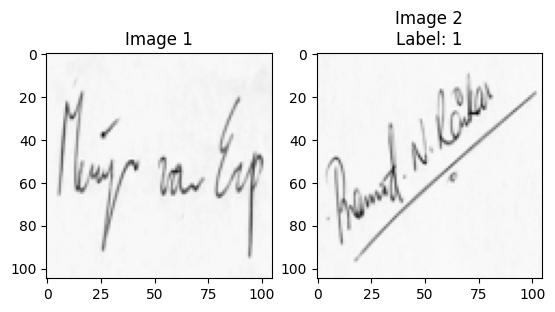

In [17]:
import matplotlib.pyplot as plt

def show_siamese_pair(dataset, index):
    img1, img2, label = dataset[index]

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img1.permute(1, 2, 0), cmap="gray")
    ax[1].imshow(img2.permute(1, 2, 0), cmap="gray")

    ax[0].set_title("Image 1")
    ax[1].set_title("Image 2\nLabel: {}".format(int(label.item())))
    plt.show()

show_siamese_pair(siamese_dataset, 0)


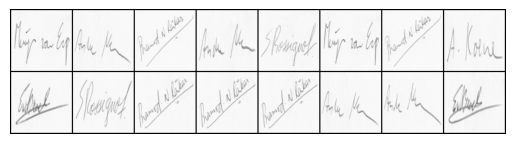

Labels: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [18]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Function to show images
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # Convert from Tensor to NumPy
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

# Create a DataLoader for visualization
vis_dataloader = DataLoader(siamese_dataset, shuffle=True, batch_size=8)

# Get a batch of data
dataiter = iter(vis_dataloader)
example_batch = next(dataiter)

# Concatenate images (image1 and image2 side by side)
concatenated = torch.cat((example_batch[0], example_batch[1]), 0)

# Display the images
imshow(torchvision.utils.make_grid(concatenated, nrow=8))

# Print the labels for the image pairs
print("Labels:", example_batch[2].numpy())


In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        # CNN Layers
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=1),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),

            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),
        )

        # Fully Connected Layers
        self.fc1 = nn.Sequential(
            nn.Linear(30976, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),

            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),

            nn.Linear(128, 2)
        )

    def forward_once(self, x):
        """ Forward pass for one image """
        output = self.cnn1(x)
        output = output.view(output.size(0), -1)  # Flatten
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        """ Siamese forward pass for two images """
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

# Instantiate the model
model = SiameseNetwork()
print(model)


SiameseNetwork(
  (cnn1): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU(inplace=True)
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout2d(p=0.3, inplace=False)
    (9): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout2d(p=0.3, inplace=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=30976, out_features=1024, bias=True)
    (1): Re

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ContrastiveLoss(nn.Module):
    """
    Contrastive loss function for Siamese Networks.
    Based on: http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    """

    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        """
        Computes contrastive loss.

        Arguments:
        - output1, output2: Feature vectors from Siamese Network
        - label: 1 if same class, 0 if different class

        Returns:
        - Contrastive loss value
        """
        # Compute Euclidean distance
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim=True)

        # Compute Contrastive Loss
        loss = torch.mean(
            (1 - label) * torch.pow(euclidean_distance, 2) +  # Similar pairs (label=1)
            (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2)  # Dissimilar pairs (label=0)
        )

        return loss


In [21]:
import torch
from torch.utils.data import DataLoader

# Define DataLoader for training
train_dataloader = DataLoader(
    siamese_dataset,
    shuffle=True,
    num_workers=4,  # Reduce workers if system has low resources
    batch_size=Config.train_batch_size
)

# Check if the DataLoader is working
dataiter = iter(train_dataloader)
batch = next(dataiter)

print(f"Batch size: {len(batch[0])}")  # Prints the batch size
print(f"Label tensor: {batch[2]}")  # Prints labels


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch size: 32
Label tensor: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [22]:
import torch

# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    print("✅ GPU is available!")
    device = torch.device("cuda")
else:
    print("❌ No GPU found, using CPU.")
    device = torch.device("cpu")

# Print device info
print(f"Using device: {device}")


❌ No GPU found, using CPU.
Using device: cpu


In [23]:
import torch
import torch.optim as optim

# Check if GPU is available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Declare Siamese Network and move to the correct device
net = SiameseNetwork().to(device)

# Declare Loss Function
criterion = ContrastiveLoss().to(device)

# Declare Optimizer
optimizer = optim.RMSprop(
    net.parameters(),
    lr=1e-4,
    alpha=0.99,
    eps=1e-8,
    weight_decay=0.0005,
    momentum=0.9
)


Using device: cpu


In [24]:
def train():
    counter = []
    loss_history = []
    iteration_number = 0

    # Ensure model is on the correct device
    net.to(device)

    for epoch in range(Config.train_number_epochs):
        for i, data in enumerate(train_dataloader, 0):
            img0, img1, label = data

            # Move data to CPU or GPU based on availability
            img0, img1, label = img0.to(device), img1.to(device), label.to(device)

            optimizer.zero_grad()
            output1, output2 = net(img0, img1)
            loss_contrastive = criterion(output1, output2, label)

            loss_contrastive.backward()
            optimizer.step()

            if i % 50 == 0:
                print(f"Epoch {epoch} | Iteration {i} | Loss: {loss_contrastive.item():.6f}")
                iteration_number += 10
                counter.append(iteration_number)
                loss_history.append(loss_contrastive.item())

    return net


In [25]:
import torch

# Set device to CPU if no GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Train the model (ensuring it runs on the correct device)
model = train()

# Save the trained model
torch.save(model.state_dict(), "model.pt")

print("✅ Model Saved Successfully")


Using device: cpu
Epoch 0 | Iteration 0 | Loss: 3.611953
Epoch 1 | Iteration 0 | Loss: 79.248306
Epoch 2 | Iteration 0 | Loss: 980.896606
Epoch 3 | Iteration 0 | Loss: 46.845886
Epoch 4 | Iteration 0 | Loss: 0.242868
Epoch 5 | Iteration 0 | Loss: 0.352262
Epoch 6 | Iteration 0 | Loss: 2.365972
Epoch 7 | Iteration 0 | Loss: 4.023132
Epoch 8 | Iteration 0 | Loss: 0.448555
Epoch 9 | Iteration 0 | Loss: 0.882048
Epoch 10 | Iteration 0 | Loss: 0.603197
Epoch 11 | Iteration 0 | Loss: 1.403944
Epoch 12 | Iteration 0 | Loss: 0.459278
Epoch 13 | Iteration 0 | Loss: 1.636303
Epoch 14 | Iteration 0 | Loss: 1.153492
Epoch 15 | Iteration 0 | Loss: 0.367082
Epoch 16 | Iteration 0 | Loss: 0.971985
Epoch 17 | Iteration 0 | Loss: 0.499216
Epoch 18 | Iteration 0 | Loss: 0.311288
Epoch 19 | Iteration 0 | Loss: 2.126952
✅ Model Saved Successfully


In [26]:
import torch

# Set device to CPU if no GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model and move it to the correct device
model = SiameseNetwork().to(device)

# Load the saved model while ensuring it works on the selected device
model.load_state_dict(torch.load("model.pt", map_location=device))

# Set model to evaluation mode
model.eval()

print("✅ Model Loaded Successfully")


<All keys matched successfully>

In [29]:
import torch
import pandas as pd
import os
from torch.utils.data import Dataset
from PIL import Image

class SiameseNetworkDataset(Dataset):
    def __init__(self, training_csv=None, training_dir=None, transform=None):
        # Ensure CSV path is provided
        if training_csv is None or training_dir is None:
            raise ValueError("Both training_csv and training_dir must be provided!")

        # Read CSV file
        self.training_df = pd.read_csv(training_csv)

        # Ensure correct column names
        if len(self.training_df.columns) == 2:
            self.training_df.columns = ["image1", "label"]  # If only 2 columns
        elif len(self.training_df.columns) == 3:
            self.training_df.columns = ["image1", "image2", "label"]  # If 3 columns
        else:
            raise ValueError("CSV file format is incorrect! Expected 2 or 3 columns.")

        self.training_dir = training_dir
        self.transform = transform

    def __getitem__(self, index):
        if "image2" in self.training_df.columns:
            # If dataset includes pairs of images
            image1_path = os.path.join(self.training_dir, self.training_df.iloc[index, 0])
            image2_path = os.path.join(self.training_dir, self.training_df.iloc[index, 1])

            img0 = Image.open(image1_path).convert("L")
            img1 = Image.open(image2_path).convert("L")

            if self.transform:
                img0 = self.transform(img0)
                img1 = self.transform(img1)

            return img0, img1, torch.tensor([float(self.training_df.iloc[index, 2])])

        else:
            # If dataset has single images (e.g., classification)
            image_path = os.path.join(self.training_dir, self.training_df.iloc[index, 0])
            img = Image.open(image_path).convert("L")

            if self.transform:
                img = self.transform(img)

            return img, torch.tensor([float(self.training_df.iloc[index, 1])])

    def __len__(self):
        return len(self.training_df)


In [33]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
test_csv_path = "/content/drive/MyDrive/SignatureForgeryDetection/test_data.csv"


In [35]:
test_csv_path = "/content/test_data.csv"


In [37]:
import os

# Check the test directory
test_dir = "/content/drive/MyDrive/SignatureForgeryDetection/"

# List all files in the directory
print("Files in test directory:", os.listdir(test_dir))


Files in test directory: ['README.md', 'Signature Forgery Detection Final Report.docx', 'Signature Forgery Detection Final Report.pdf', 'SignatureForgeryDetection.ipynb', 'Signature Forgery Detection_Final PPT.pdf', 'real', 'Research papers', 'forged', 'training.csv', '.ipynb_checkpoints', '__pycache__', 'dataset.py', 'train', 'test', 'train_data.csv', 'test_data.csv', 'train_pairs.csv']


In [38]:
test_csv_path = "/content/drive/MyDrive/SignatureForgeryDetection/test_data.csv"

import pandas as pd

# Try to load the CSV file
try:
    df = pd.read_csv(test_csv_path)
    print("✅ File loaded successfully!")
    print(df.head())  # Display the first few rows to check content
except FileNotFoundError:
    print("❌ File still not found! Double-check the path.")


✅ File loaded successfully!
                                          image_path  label
0  /content/drive/MyDrive/SignatureForgeryDetecti...      1
1  /content/drive/MyDrive/SignatureForgeryDetecti...      1
2  /content/drive/MyDrive/SignatureForgeryDetecti...      1
3  /content/drive/MyDrive/SignatureForgeryDetecti...      1
4  /content/drive/MyDrive/SignatureForgeryDetecti...      1


In [40]:
test_dataset = SiameseNetworkDataset(
    training_csv=test_csv_path,  # Use 'training_csv' instead of 'csv_path'
    training_dir="/content/drive/MyDrive/SignatureForgeryDetection/test",
    transform=transforms.Compose([
        transforms.Resize((105, 105)),
        transforms.ToTensor()
    ])
)


In [43]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformation (resizing and normalizing the images)
transform = transforms.Compose([
    transforms.Resize(256),    # Resize image to 256x256 (adjust as needed)
    transforms.ToTensor(),     # Convert images to PyTorch tensors
])

# Load the test dataset (e.g., using MNIST for illustration)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define the test DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 11.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 340kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.16MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.47MB/s]


In [44]:
# Set device to CUDA if available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ensure the model is in evaluation mode and move it to the correct device
model.eval()
model.to(device)


SiameseNetwork(
  (cnn1): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU(inplace=True)
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout2d(p=0.3, inplace=False)
    (9): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout2d(p=0.3, inplace=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=30976, out_features=1024, bias=True)
    (1): Re

In [55]:
class YourModel(nn.Module):
    def __init__(self):
        super(YourModel, self).__init__()

        # Define convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Adjust stride/padding if needed
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Adjust stride/padding if needed

        # Define fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 1024)  # Initial assumption
        self.fc2 = nn.Linear(1024, 2)

    def forward(self, x0, x1):
        # Pass x0 through the convolutional layers
        x0 = self.conv1(x0)
        x0 = F.relu(x0)
        x0 = self.conv2(x0)
        x0 = F.relu(x0)

        # Print the size before flattening
        print(f"x0 shape before flattening: {x0.shape}")

        # Flatten the output of the convolutional layers
        x0 = x0.view(x0.size(0), -1)

        # Pass x1 through the convolutional layers
        x1 = self.conv1(x1)
        x1 = F.relu(x1)
        x1 = self.conv2(x1)
        x1 = F.relu(x1)

        # Print the size before flattening
        print(f"x1 shape before flattening: {x1.shape}")

        # Flatten the output of the convolutional layers
        x1 = x1.view(x1.size(0), -1)

        # Pass through fully connected layers
        x0 = self.fc1(x0)
        x1 = self.fc1(x1)

        return x0, x1


In [62]:
import torch.nn as nn

class SiameseNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=10),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=7),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 128, kernel_size=4),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, kernel_size=4),
            nn.ReLU()
        )

        # Add Global Average Pooling
        self.gap = nn.AdaptiveAvgPool2d((1, 1))  # Now correctly inside class

        # Final fully connected layer
        self.fc = nn.Sequential(
            nn.Linear(256, 1024),  # 256 channels from last conv
            nn.Sigmoid()
        )

    def forward_one(self, x):
        x = self.cnn(x)
        x = self.gap(x)  # Reduces to [batch, 256, 1, 1]
        x = x.view(x.size(0), -1)  # Flattens to [batch, 256]
        x = self.fc(x)  # Output [batch, 1024]
        return x

    def forward(self, input1, input2):
        output1 = self.forward_one(input1)
        output2 = self.forward_one(input2)
        return output1, output2

In [63]:
# Create model instance
model = SiameseNetwork()

# Test with dummy input
dummy_input = torch.randn(32, 1, 105, 105)  # Batch of 32 105x105 grayscale images
output1, output2 = model(dummy_input, dummy_input)
print(f"Output shapes: {output1.shape}, {output2.shape}")  # Should be [32, 1024]

Output shapes: torch.Size([32, 1024]), torch.Size([32, 1024])


In [64]:
def forward_one(self, x):
    print("Input:", x.shape)
    x = self.cnn(x)
    print("After CNN:", x.shape)
    x = self.gap(x)
    print("After GAP:", x.shape)
    # ... rest of forward pass

In [65]:
transform = transforms.Compose([
    transforms.Resize((105, 105)),  # Ensure consistent input size
    transforms.ToTensor()
])

In [58]:
# Verify input dimensions
print(f"Input shape: {x0.shape}")  # Should be [32, 1, 105, 105]

# Add shape check in forward pass
def forward_one(self, x):
    x = self.cnn(x)
    print(f"CNN output shape: {x.shape}")  # Debug print
    x = x.view(x.size(0), -1)
    print(f"Flattened shape: {x.shape}")  # Should match self.flattened_dim
    x = self.fc(x)
    return x

Input shape: torch.Size([32, 1, 256, 256])


In [59]:
transform = transforms.Compose([
    transforms.Resize((105, 105)),  # Fixed size
    transforms.ToTensor(),
])

In [60]:
nn.Conv2d(64, 128, kernel_size=7, padding=3)  # Preserves spatial dimensions

Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))

In [71]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SignatureForgeryDetection_Copy/signature_data.csv')
print(df.columns.tolist())  # Show all available columns

['image_path', 'label']


In [72]:
class SignatureDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        # Verify column names
        print("Available columns:", self.annotations.columns.tolist())

        # Adjust these based on your actual column names
        self.image_col = 'image_path'  # Change to your actual image path column
        self.label_col = 'label'       # Change to your actual label column

        # Create pairs
        self.pairs = []
        genuine = self.annotations[self.annotations[self.label_col] == 1]
        forged = self.annotations[self.annotations[self.label_col] == 0]

        # Create genuine-genuine pairs
        for i in range(len(genuine)):
            for j in range(i+1, min(i+2, len(genuine))):
                self.pairs.append((
                    genuine.iloc[i][self.image_col],
                    genuine.iloc[j][self.image_col],
                    1  # Similar pair
                ))

        # Create genuine-forged pairs
        for i in range(min(len(genuine), len(forged))):
            self.pairs.append((
                genuine.iloc[i][self.image_col],
                forged.iloc[i][self.image_col],
                0  # Dissimilar pair
            ))

In [76]:
import pandas as pd
import os

# First inspect your CSV structure
csv_path = '/content/drive/MyDrive/SignatureForgeryDetection_Copy/signature_data.csv'
df = pd.read_csv(csv_path)
print("CSV columns:", df.columns.tolist())

# Correct Dataset Class
class SignatureDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        # Use actual column names from your CSV - ADJUST THESE!
        self.image_col = 'image_path'  # Change to your actual image column name
        self.label_col = 'label'      # Change to your actual label column name

        # Verify columns exist
        if self.image_col not in self.annotations.columns:
            raise ValueError(f"Column '{self.image_col}' not found in CSV")
        if self.label_col not in self.annotations.columns:
            raise ValueError(f"Column '{self.label_col}' not found in CSV")

        # Create pairs
        self.pairs = []
        genuine = self.annotations[self.annotations[self.label_col] == 1]
        forged = self.annotations[self.annotations[self.label_col] == 0]

        # Create genuine-genuine pairs
        for i in range(len(genuine)):
            for j in range(i+1, min(i+2, len(genuine))):
                self.pairs.append((
                    genuine.iloc[i][self.image_col],
                    genuine.iloc[j][self.image_col],
                    1  # Similar
                ))

        # Create genuine-forged pairs
        for i in range(min(len(genuine), len(forged))):
            self.pairs.append((
                genuine.iloc[i][self.image_col],
                forged.iloc[i][self.image_col],
                0  # Dissimilar
            ))

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img1_path = os.path.join(self.root_dir, self.pairs[idx][0])
        img2_path = os.path.join(self.root_dir, self.pairs[idx][1])

        img1 = Image.open(img1_path).convert('L')
        img2 = Image.open(img2_path).convert('L')

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        label = torch.tensor(self.pairs[idx][2], dtype=torch.float32)
        return img1, img2, label

# Usage example:
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = SignatureDataset(
    csv_file=csv_path,
    root_dir='/content/drive/MyDrive/SignatureForgeryDetection_Copy/signature_data',
    transform=transform
)

# Check the first sample
img1, img2, label = dataset[0]
print(f"Image 1 shape: {img1.shape}")
print(f"Image 2 shape: {img2.shape}")
print(f"Label: {label.item()}")

CSV columns: ['image_path', 'label']
Image 1 shape: torch.Size([1, 150, 150])
Image 2 shape: torch.Size([1, 150, 150])
Label: 1.0


CSV columns: ['image_path', 'label']

First 5 rows:
                                          image_path  label
0  /content/drive/MyDrive/SignatureForgeryDetecti...      1
1  /content/drive/MyDrive/SignatureForgeryDetecti...      1
2  /content/drive/MyDrive/SignatureForgeryDetecti...      1
3  /content/drive/MyDrive/SignatureForgeryDetecti...      1
4  /content/drive/MyDrive/SignatureForgeryDetecti...      1

Image 1 shape: torch.Size([1, 150, 150])
Image 2 shape: torch.Size([1, 150, 150])
Label: 1.0 (1=Genuine, 0=Forged)

Sample pairs from dataset:


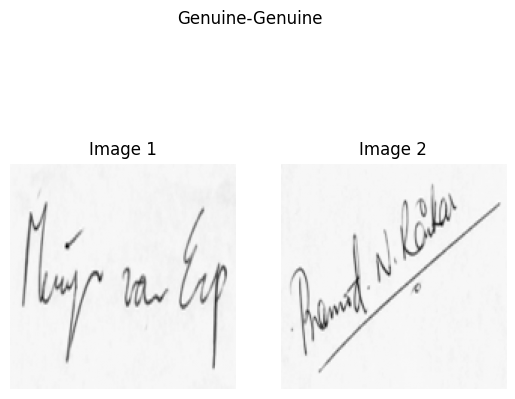

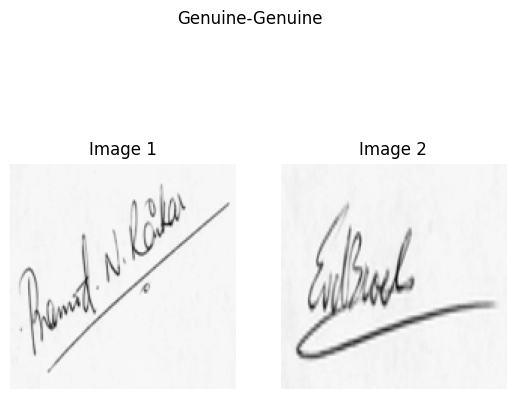

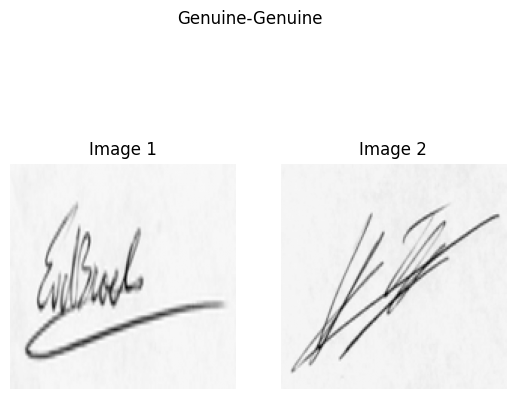

In [77]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# First inspect your CSV structure
csv_path = '/content/drive/MyDrive/SignatureForgeryDetection_Copy/signature_data.csv'
df = pd.read_csv(csv_path)
print("CSV columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# Correct Dataset Class
class SignatureDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        # Use actual column names from your CSV - ADJUST THESE!
        self.image_col = 'image_path'  # Change to your actual image column name
        self.label_col = 'label'       # Change to your actual label column name

        # Verify columns exist
        if self.image_col not in self.annotations.columns:
            raise ValueError(f"Column '{self.image_col}' not found in CSV")
        if self.label_col not in self.annotations.columns:
            raise ValueError(f"Column '{self.label_col}' not found in CSV")

        # Create pairs
        self.pairs = []
        genuine = self.annotations[self.annotations[self.label_col] == 1]
        forged = self.annotations[self.annotations[self.label_col] == 0]

        # Create genuine-genuine pairs
        for i in range(len(genuine)):
            for j in range(i+1, min(i+2, len(genuine))):
                self.pairs.append((
                    genuine.iloc[i][self.image_col],
                    genuine.iloc[j][self.image_col],
                    1  # Similar
                ))

        # Create genuine-forged pairs
        for i in range(min(len(genuine), len(forged))):
            self.pairs.append((
                genuine.iloc[i][self.image_col],
                forged.iloc[i][self.image_col],
                0  # Dissimilar
            ))

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img1_path = os.path.join(self.root_dir, self.pairs[idx][0])
        img2_path = os.path.join(self.root_dir, self.pairs[idx][1])

        img1 = Image.open(img1_path).convert('L')  # Convert to grayscale
        img2 = Image.open(img2_path).convert('L')

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        label = torch.tensor(self.pairs[idx][2], dtype=torch.float32)
        return img1, img2, label

# Define transforms
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Grayscale normalization
])

# Create dataset
dataset = SignatureDataset(
    csv_file=csv_path,
    root_dir='/content/drive/MyDrive/SignatureForgeryDetection_Copy/signature_data',
    transform=transform
)

# Check the first sample
img1, img2, label = dataset[0]
print(f"\nImage 1 shape: {img1.shape}")
print(f"Image 2 shape: {img2.shape}")
print(f"Label: {label.item()} (1=Genuine, 0=Forged)")

# Visualization function
def show_pair(img1, img2, label, distance=None):
    """Display image pair with label"""
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img1.squeeze().numpy(), cmap='gray')
    ax1.set_title('Image 1')
    ax1.axis('off')

    ax2.imshow(img2.squeeze().numpy(), cmap='gray')
    ax2.set_title('Image 2')
    ax2.axis('off')

    status = "Genuine-Genuine" if label == 1 else "Genuine-Forged"
    if distance is not None:
        plt.suptitle(f"{status}\nDistance: {distance:.2f}", y=1.05)
    else:
        plt.suptitle(status, y=1.05)
    plt.show()

# Visualize first few pairs
print("\nSample pairs from dataset:")
for i in range(3):
    img1, img2, label = dataset[i]
    show_pair(img1, img2, label.item())


Showing 3 forged signature pairs:


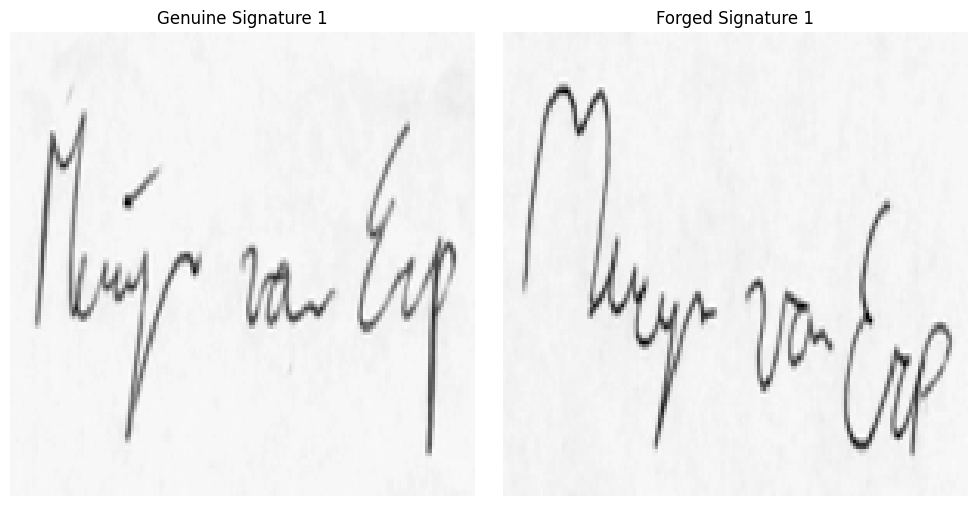

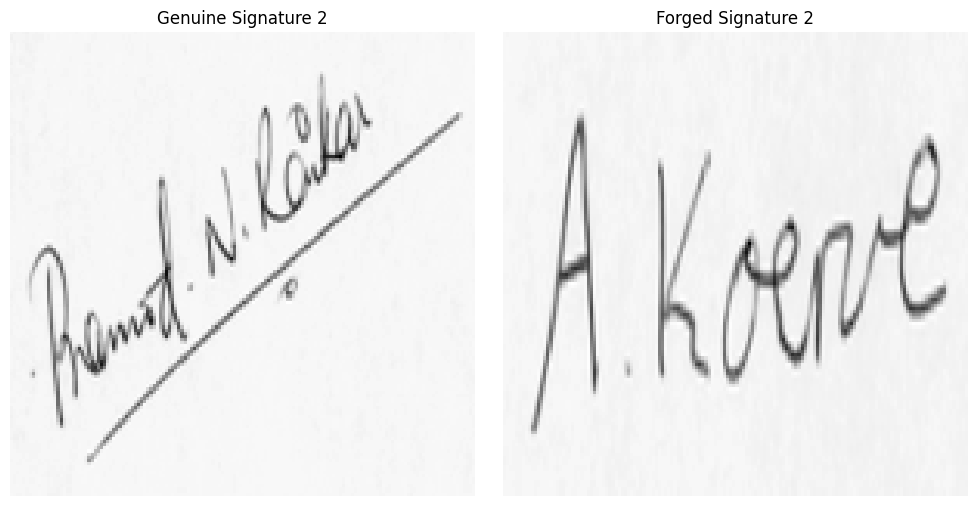

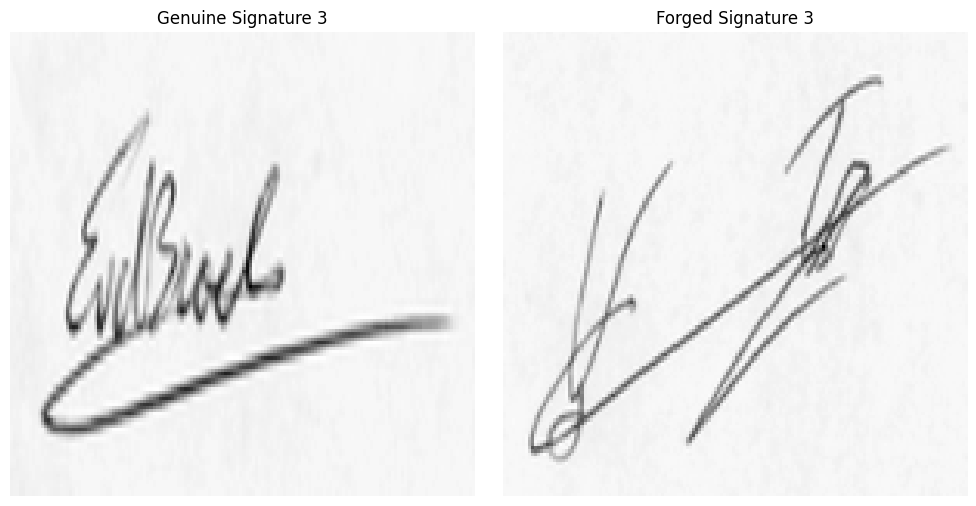

In [78]:
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset as shown previously
# Let's find and display forged signatures

def show_forged_samples(dataset, num_samples=5):
    forged_samples = []

    # Collect forged pairs (where label == 0)
    for i in range(len(dataset)):
        _, _, label = dataset[i]
        if label.item() == 0:  # 0 represents forged
            img1, img2, _ = dataset[i]
            forged_samples.append((img1, img2))
            if len(forged_samples) >= num_samples:
                break

    # Display the forged samples
    print(f"\nShowing {len(forged_samples)} forged signature pairs:")
    for i, (img1, img2) in enumerate(forged_samples):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(img1.squeeze().numpy(), cmap='gray')
        plt.title(f"Genuine Signature {i+1}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(img2.squeeze().numpy(), cmap='gray')
        plt.title(f"Forged Signature {i+1}")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

# Display forged samples
show_forged_samples(dataset, num_samples=3)